# Data Analysis and Vis, HW 5
*Adapted from COMP 5360 / MATH 4100, University of Utah, http://datasciencecourse.net/*

Due: July 3

In this homework, you will use classification methods to classify handwritten digits (Part 1) and predict the popularity of online news (Part 2). We hope these exercises will give you an idea of the broad usage of classificaiton methods. 

In [8]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

## Part1: MNIST handwritten digits

THE MNIST handwritten digit dataset consists of images of handwritten digits, together with labels indicating which digit is in each image. You will see that images are just matrices with scalar values, and that we can use all the classifcation algorithms we studied on them.  We saw these in class when we looked at clustering methods.

Becaue both the features and the labels are present in this dataset (and labels for large datasets are generally difficult/expensive to obtain), this dataset is frequently used as a benchmark to compare various classification methods. 
For example, [this webpage](http://yann.lecun.com/exdb/mnist/) gives a comparison of a variety of different classification methods on MNIST (Note that the tests on this website are for higher resolution images than we'll use.) 

In this problem, we'll use scikit-learn to compare classification methods on the MNIST dataset. 

There are several versions of the MNIST dataset. We'll use the one that is built-into scikit-learn, described [here](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html). 

* Classes: 10 (one for each digit)
* Samples total: 1797
* Samples per class: $\approx$180
* Dimensionality: 64 (8 pixels by 8 pixels)
* Features: integers 0-16 (grayscale value; 0 is white, 16 is black)

Here are some examples of the images. Note that the digits have been size-normalized and centered in a fixed-size ($8\times8$ pixels) image.

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_digits_classification_001.png" width="500">

Note that we will scale the data before running them through our algorithms, which will also alter their appearance when we plot them. You can read details about scaling and why it's important [here](http://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling).

In [9]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


In [10]:
# this is what one digit (a zero) looks like
print("===\nThe raw data")
print(digits.images[0])
print("===\nThe scaled data")
print(X[0])
print("===\nThe digit")
print(digits.target[0])

===
The raw data
[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
===
The scaled data
[ 0.         -0.33501649 -0.04308102  0.27407152 -0.66447751 -0.84412939
 -0.40972392 -0.12502292 -0.05907756 -0.62400926  0.4829745   0.75962245
 -0.05842586  1.12772113  0.87958306 -0.13043338 -0.04462507  0.11144272
  0.89588044 -0.86066632 -1.14964846  0.51547187  1.90596347 -0.11422184
 -0.03337973  0.48648928  0.46988512 -1.49990136 -1.61406277  0.07639777
  1.54181413 -0.04723238  0.          0.76465553  0.05263019 -1.44763006
 -1.73666443  0.04361588  1.43955804  0.         -0.06134367  0.8105536
  0.63011714 -1.12245711 -1.06623158  0.66096475  0.81845076 -0.08874162
 -0.03543326  0.74211893  1.15065212 -0.86867056  0.11012973  0.53761116
 -0.75743581 -0.20978513 -

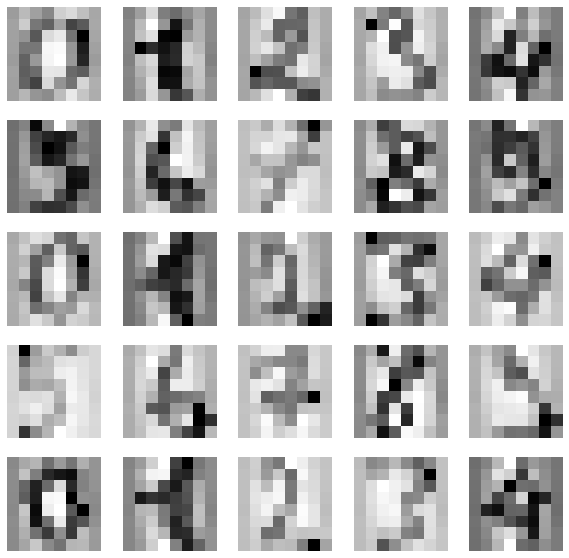

In [11]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

You might find [this webpage](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) helpful. 

### Task 1.1: Classification with Support Vector Machines (SVM)

1. Split the data into a training and test set using the command 
```
train_test_split(X, y, random_state=1, test_size=0.8)
```
+ Use SVM with an `rbf` kernel and parameter `C=100` to build a classifier using the *training dataset*.
+ Using the *test dataset*, evaluate the accuracy of the model. Again using the *test dataset*, compute the confusion matrix. What is the most common mistake that the classifier makes? 
+ Print all of these misclassified digits as images. 
+ Using the 'cross_val_score' function, evaluate the accuracy of the SVM for 100 different values of the parameter C between 1 and 500. What is the best value? 
+ Try to train and test the algorithm on the raw (non-scaled) data. What's your accuracy score?

In [12]:
# your solution goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
classifier = svm.SVC(kernel='rbf', C=500, gamma='scale')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 139   0   0  13   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   3   1   1   0   0   0   1 127   0]
 [  0   2   0   2   0   2   1   2   2 141]]
Accuracy =  0.9534075104311543


**Your Interpretation**: TODO

biggest mistake is 4 predicting as a 7.

[16, 60, 84, 112, 169, 176, 203, 210, 225, 248, 249, 284, 298, 347, 361, 385, 387, 394, 400, 462, 487, 523, 528, 533, 537, 540, 545, 576, 591, 635, 648, 683, 721, 726, 735, 738, 755, 757, 782, 785, 799, 891, 932, 957, 971, 999, 1032, 1040, 1085, 1089, 1090, 1108, 1120, 1149, 1198, 1217, 1230, 1255, 1265, 1273, 1283, 1342, 1346, 1356, 1371, 1394, 1395]


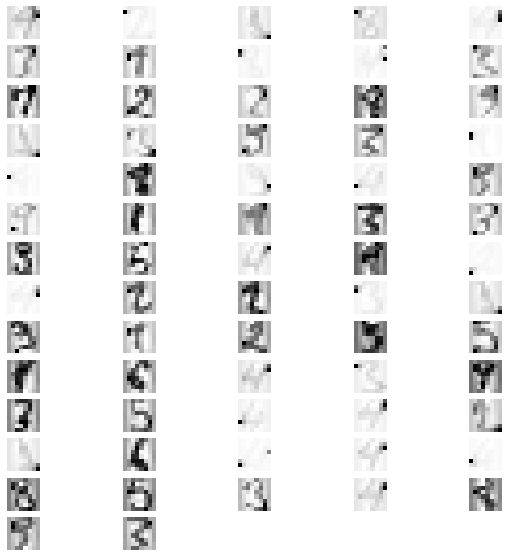

In [13]:
# y_tester = np.asarray(y_test)
# misclassified = [np.where(y_tester != classifier.predict(X_test))]
import math

misclassified = [x for x in range(len(y_test)) if (y_pred[x] != y_test[x])]

height = math.ceil(len(misclassified)/5)
# print(height)
print(misclassified)

plt.figure(figsize= (10, 10))   
for i, mi in enumerate(misclassified):
    plt.subplot(height, 5, i+1)
    plt.imshow(np.reshape(X_test[mi],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

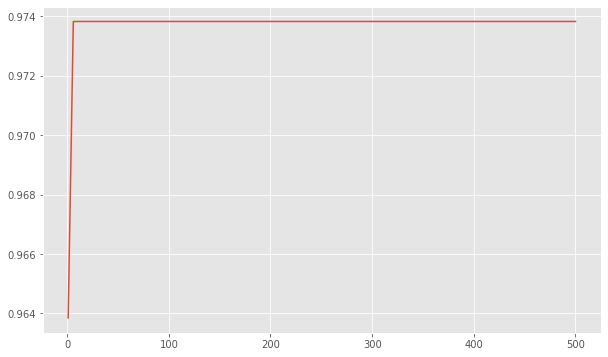

In [14]:
classifier.get_params()
Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    svm_iris = svm.SVC(kernel='rbf',gamma='scale', C = C)
    scores = cross_val_score(estimator = svm_iris, X = digits.data, y = digits.target, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

**Your Interpretation**: TODO
    
Based on the cross validation results, I would choose C is about 6.

In [15]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.8, random_state=1)
classifier = svm.SVC(kernel='rbf', C=100, gamma='scale')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[129   0   0   0   1   0   0   0   0   0]
 [  0 144   0   0   0   0   0   0   5   0]
 [  0   0 141   0   0   0   0   0   1   0]
 [  0   0   0 140   0   1   0   2   3   1]
 [  0   0   0   0 152   0   0   0   0   0]
 [  0   0   0   0   0 143   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   0   0   0   0   0 128   1]
 [  0   1   0   4   0   1   0   0   3 143]]
Accuracy =  0.9756606397774688


### Task 1.2: Prediction with k-nearest neighbors
Repeat task 1.1 using k-nearest neighbors (k-NN). In part 1, use k=10. In part 3, find the best value of k. 

In [16]:
# your solution goes here
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=1)
k = 10
classifier = KNeighborsClassifier(n_neighbors=k)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874


**Your Interpretation**: TODO

biggest mistake is 9 predicting as a 1.

[16, 25, 74, 77, 80, 102, 112, 138, 169, 171, 172, 176, 178, 185, 193, 210, 214, 225, 251, 262, 269, 284, 288, 298, 325, 337, 347, 353, 361, 385, 387, 392, 394, 396, 400, 426, 434, 441, 462, 473, 504, 511, 523, 528, 535, 537, 540, 555, 565, 576, 600, 619, 635, 648, 683, 687, 694, 697, 701, 708, 726, 730, 735, 742, 748, 757, 763, 768, 778, 791, 793, 796, 798, 799, 801, 811, 821, 829, 834, 857, 860, 882, 932, 937, 957, 958, 971, 976, 979, 1004, 1022, 1032, 1044, 1089, 1090, 1091, 1095, 1096, 1105, 1108, 1121, 1130, 1149, 1154, 1158, 1161, 1194, 1206, 1221, 1230, 1260, 1266, 1282, 1283, 1294, 1318, 1320, 1336, 1342, 1363, 1371, 1376, 1388, 1392, 1394, 1396]


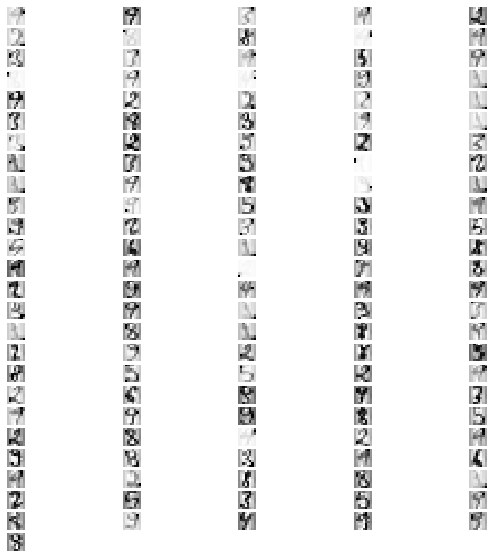

In [17]:
misclassified = [x for x in range(len(y_test)) if (y_pred[x] != y_test[x])]

height = math.ceil(len(misclassified)/5)
print(misclassified)

plt.figure(figsize= (10, 10))   
for i, mi in enumerate(misclassified):
    plt.subplot(height, 5, i+1)
    plt.imshow(np.reshape(X_test[mi],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

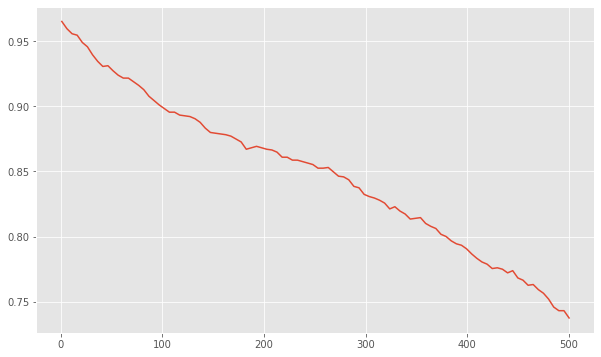

Max/Best =  1.0


In [18]:
classifier.get_params()
Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    svm_iris = KNeighborsClassifier(n_neighbors=int(C))
    scores = cross_val_score(estimator = svm_iris, X = digits.data, y = digits.target, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
 
plt.plot(Cs,Accuracies)
plt.show()
print('Max/Best = ', Cs[Accuracies.argmax()])

In [19]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.8, random_state=1)
classifier = KNeighborsClassifier(n_neighbors=k)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[130   0   0   0   0   0   0   0   0   0]
 [  0 146   0   1   1   1   0   0   0   0]
 [  2   3 128   0   0   0   0   2   7   0]
 [  0   0   0 135   0   2   0   6   3   1]
 [  0   0   0   0 150   0   0   2   0   0]
 [  0   0   0   3   1 139   1   0   0   3]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 140   0   0]
 [  0   6   2   4   0   1   0   1 117   2]
 [  2   8   0   6   0   3   0   9   3 121]]
Accuracy =  0.9388038942976356


# Part 2: Popularity of online news

For this problem, you will use classification tools to predict the popularity of online news based on attributes such as the length of the article, the number of images, the day of the week that the article was published, and some variables related to the content of the article. You can learn details about the datasetat the
[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Online+News+Popularity). 
This dataset was first used in the following conference paper: 

K. Fernandes, P. Vinagre and P. Cortez. A Proactive Intelligent Decision Support System for Predicting the Popularity of Online News. *Proceedings of the 17th EPIA 2015 - Portuguese Conference on Artificial Intelligence* (2015).

The dataset contains variables describing 39,644 articles published between January 7, 2013 and Januyary 7, 2015 on the news website, [Mashable](http://mashable.com/). 
There are 61 variables associated with each article. Of these, 58 are *predictor* variables, 2 are variables that we will not use (url and timedelta), and finally the number of shares of each article. The number of shares is what we will use to define whether or not the article was *popular*, which is what we will try to predict. You should read about the predictor variables in the file *OnlineNewsPopularity.names*. Further details about the collection and processing of the articles can be found in the conference paper. 


### Task 2.1 Import the data 
* Use the pandas.read_csv() function to import the dataset.
* To us[scikit-learn](http://scikit-learn.org), we'll need to save the data as a numpy array. Use the *DataFrame.as_matrix()* command to export the predictor variables as a numpy array called *X* this array should not include our target variable (the number of shares). We don't need the url and timedelta, so let's drop these columns. 
* Export the number of shares as a separate numpy array, called *shares*. We'll define an article to be popular if it received more shares than the median number of shares. Create a binary numpy array, *y*, which indicates whether or not each article is popular.

In [20]:
# Your code here.  Note the data and description are in the OnlineNewsPopularity directory
df = pd.read_csv("OnlineNewsPopularity.csv")
df2 = df.drop(columns=['url', ' timedelta', ' shares'])
df_mat_news = pd.DataFrame.as_matrix(df2)
shares = np.array(df[' shares'])
print(shares)

[ 593  711 1500 ... 1900 1100 1300]


/usr/local/Cellar/ipython/7.5.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


### Task 2.2 Exploratory data analysis 

First check to see if the values are reasonable. What are the min, median, and maximum number of shares? 

In [21]:
print(np.min(shares))
print(np.median(shares))
print(np.max(shares))

1
1400.0
843300


### Task 2.3 Classification using k-NN

Develop a k-NN classification model for the data. Use cross validation to choose the best value of k. What is the best accuracy you can obtain on the test data? 

7928.0
7928.0


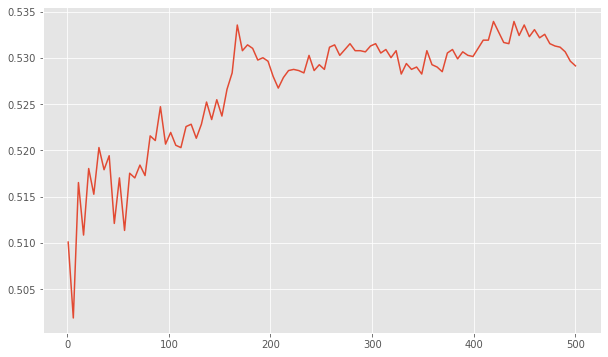

Max/Best =  419.3535353535354


In [22]:
# Your code here
shares_val = [1 if(x > np.median(shares)) else 0 for x in shares]

s_len = np.floor(len(shares_val)/5)
df_len = np.floor(len(df_mat_news)/5)
print(s_len)
print(df_len)
classifier.get_params()
Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    svm_iris = KNeighborsClassifier(n_neighbors=int(C))
    scores = cross_val_score(estimator = svm_iris, X = df_mat_news[:int(df_len)], y = shares_val[:int(s_len)], cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
 
plt.plot(Cs,Accuracies)
plt.show()
print('Max/Best = ', Cs[Accuracies.argmax()])

**Interpretation:** TODO

In [23]:
X_train, X_test, y_train, y_test = train_test_split(df_mat_news, shares_val, test_size=0.8, random_state=1)
classifier = KNeighborsClassifier(n_neighbors=k)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[11334  4637]
 [ 9650  6095]]
Accuracy =  0.5495333585571951


### Task 2.4 Classification using SVM

Develop a support vector machine classification model for the data. 
 
 * SVM is computationally expensive, so start by using only a fraction of the data, say 5,000 articles. 
 * Experimt with different Cs. Which is the best value for C?

Note that it takes multiple minutes per value of C to run on the whole dataset!

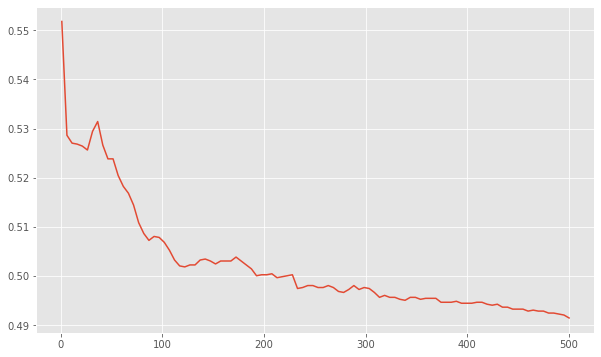

In [24]:
# Your code here
classifier.get_params()
Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    svm_iris = svm.SVC(kernel='rbf',gamma='scale', C = C)
    scores = cross_val_score(estimator = svm_iris, X = df_mat_news[:5000], y = shares_val[:5000], cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

**Interpretation:** TODO

The best C is about 30.

In [25]:
X_train, X_test, y_train, y_test = train_test_split(df_mat_news, shares_val, test_size=0.8, random_state=1)
classifier = svm.SVC(kernel='rbf', C=100, gamma='scale')
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[12384  3587]
 [10053  5692]]
Accuracy =  0.569933156766301


### Task 2.5 Classification using decision trees

Develop a decision tree classification model for the data. 

Use cross validation to choose good values of the max tree depth (*max_depth*) and minimum samples split (*min_samples_split*). 

In [28]:
# Your code here
mx = 0
mn = 0
accuracy = 0

for n_depth in range(2,20):
    for n_accur in range(2,30):
        svm_iris = tree.DecisionTreeClassifier(max_depth = n_depth, min_samples_split = n_accur)
        scores = cross_val_score(estimator = svm_iris, X = df_mat_news[:5000], y = shares_val[:5000], cv=5, scoring='accuracy')    
        if scores.mean() > accuracy:
            mx = n_depth
            mn = n_accur
            accuracy = scores.mean()
        
print(mx, ' ', mn)

5   3


In [29]:
X_train, X_test, y_train, y_test = train_test_split(df_mat_news, shares_val, test_size=0.8, random_state=1)
classifier = tree.DecisionTreeClassifier(max_depth = mx, min_samples_split = mn)
y_pred = classifier.fit(X_train, y_train).predict(X_test)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
print('Accuracy = ', metrics.accuracy_score(y_test, y_pred))

[[10947  5024]
 [ 6628  9117]]
Accuracy =  0.6326144532727961


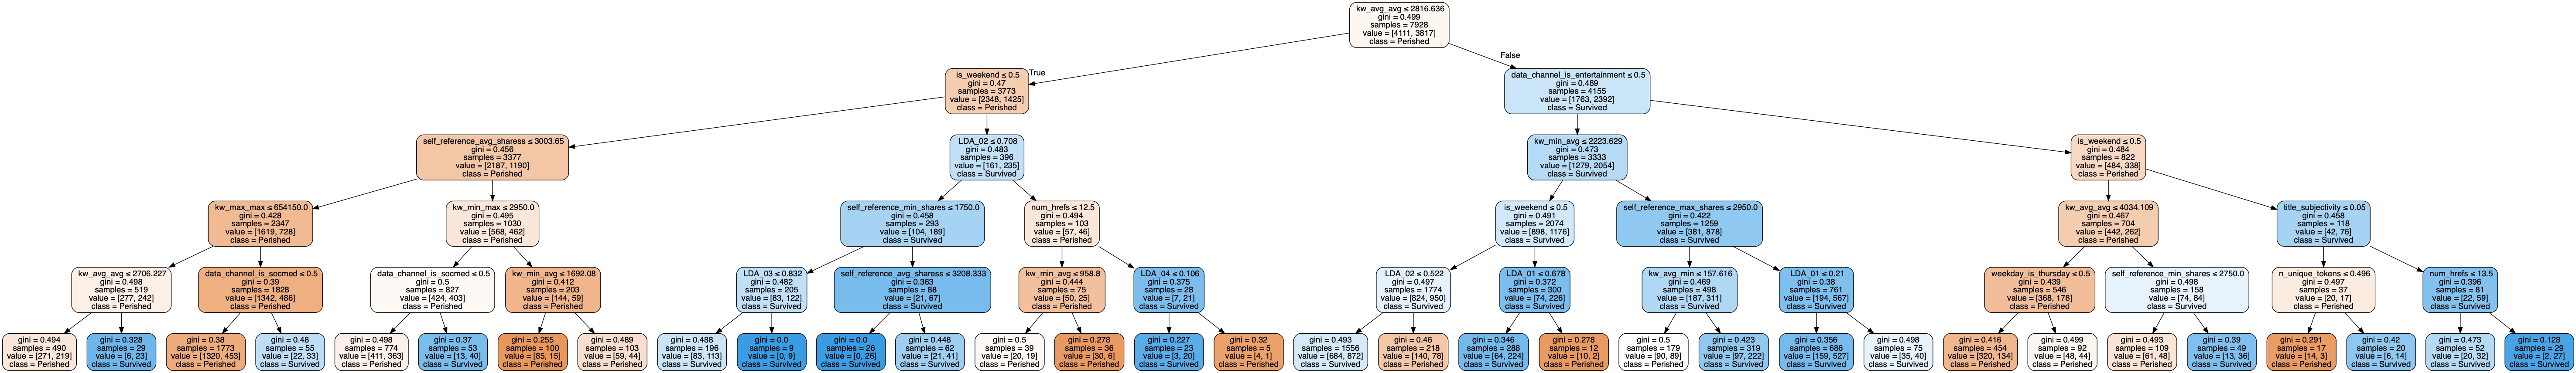

In [31]:
from IPython.display import Image, display  
import pydotplus 
from scipy import misc

def renderTree(my_tree, features):
    # hacky solution of writing to files and reading again
    # necessary due to library bugs
    filename = "temp.dot"
    with open(filename, 'w') as f:
        f = tree.export_graphviz(my_tree, 
                                 out_file=f, 
                                 feature_names=features, 
                                 class_names=["Perished", "Survived"],  
                                 filled=True, 
                                 rounded=True,
                                 special_characters=True)
  
    dot_data = ""
    with open(filename, 'r') as f:
        dot_data = f.read()

    graph = pydotplus.graph_from_dot_data(dot_data)
    image_name = "temp.png"
    graph.write_png(image_name)  
    display(Image(filename=image_name))
    
renderTree(classifier, df2.columns)

### Task 2.6 Describe your findings
1. Which method (k-NN, SVM, Decision Tree) worked best?
+ How did different parameters influence the accuracy?
+ Which model is easiest do interpret?
+ How would you interpret your results?


**Your Solution:** TODO
1. The decision tree had the highest accuracy with 63%

2. Increased C leaned towards a better accuracy, but started to tail off as C approached 500. The smaller Cs tended to have a better accuracy, as Cs approached 500 the accuracy dropped dramatically. The decision tree didn't change accuracy much(even though it took the longest to run), unless depth and min split numbers were outragously large.

3. KNN was easiest to see what was happening. When I changed values, the output stayed pretty true to what I was expecting.

4. Looking at the decision tree, the two main factors that branch 50% of the data are is_weekend and data_channel_is_entertainment. Since the accuracy is pretty low, they may not influence as much as it is saying. This is the same for the svc and knn, since the accuracies are around 50%, they may not know the correct influencer either.